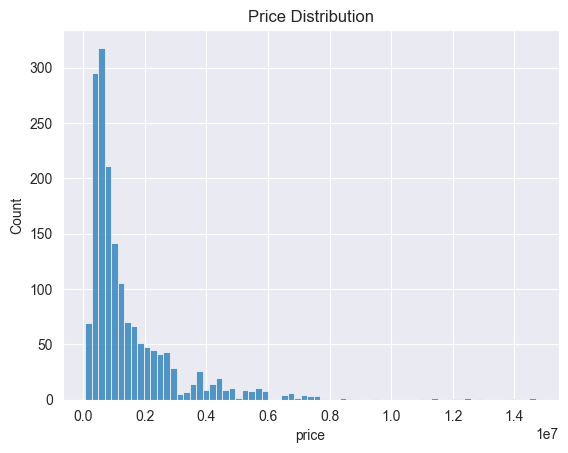

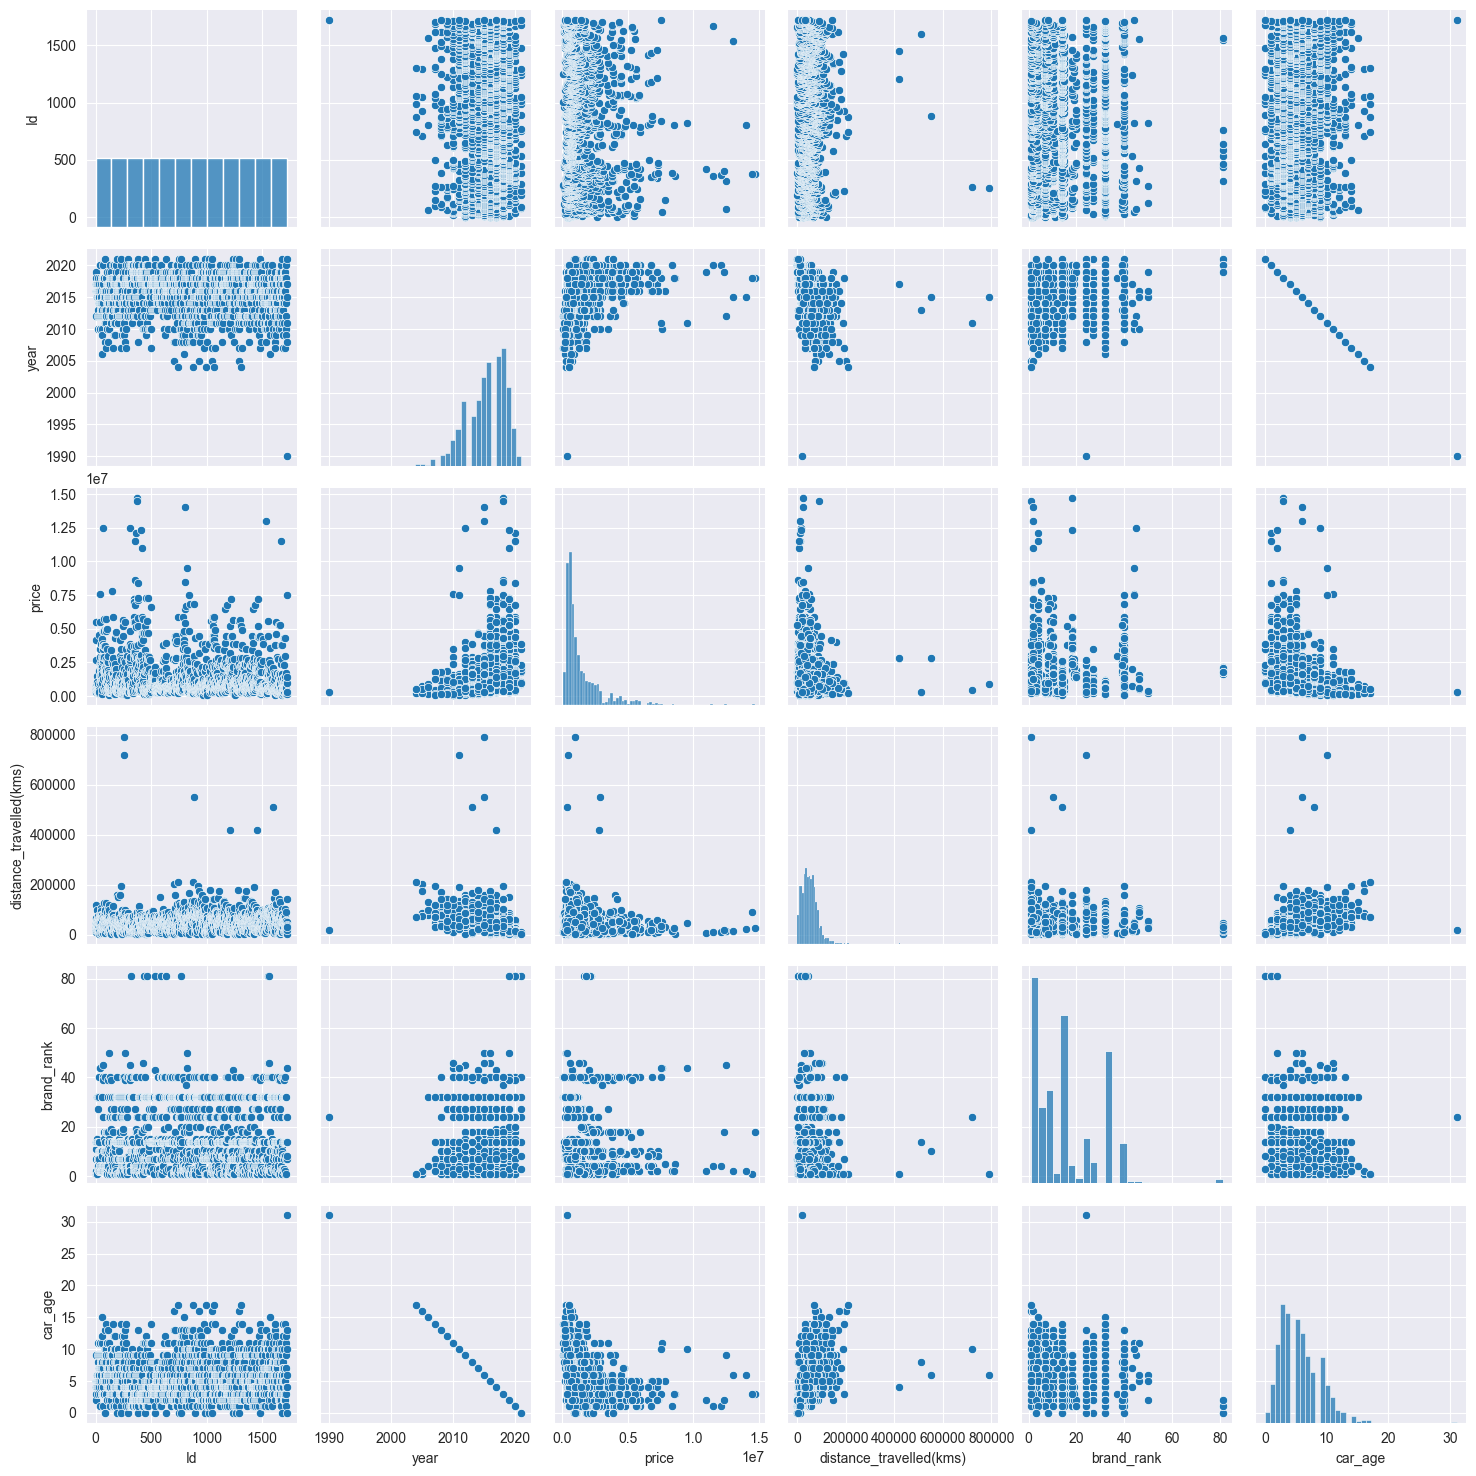

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv('cars.csv')

sns.histplot(df['price'])
plt.title('Price Distribution')
plt.show()


sns.pairplot(df)
plt.show()


df = df.dropna()

categorical_features = ['brand', 'fuel_type', 'city']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(df[categorical_features])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))


df = df.drop(categorical_features, axis=1)
df = pd.concat([df, encoded_df], axis=1)


X = df.drop(['price', 'Id', 'full_model_name'], axis=1)
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


importance = model.coef_
features = X.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
